# Clustering Sprint Challenge

Objectives:
* Describe two clustering algorithms
* Create k clusters with the k-Means algorithm
* Compare/contrast the performance of the two algorithms on two datasets

### 1. Describe two different clustering algorithms

There are many clustering algorithms with profoundly different implementations. Their objective is the same - to identify groups in unlabeled data.

Fill out the below python objects.

In [0]:
# Clustering algorithm 1:

algorithm_one_name = "K Means"
algorithm_one_description = "K centroids are initialized, randomly or through sampling \
                             \nThen loop through the following 2 steps: \
                             \n1. Each point is assigned to the nearest centroid \
                             \n2. New centroids are calculated by taking the means of the assigned points \
                             \nClusters found minimize within-cluster sum of squares, or 'inertia' \
                             \nWorks best when clusters are convex and isotropic\n"

# Clustering algorithm 2:

algorithm_two_name = "Spectral Clustering"
algorithm_two_description = "An affinity matrix is first computed \
                             \nIt contains some sort of pairwise distance/similarity measure \
                             \nThe matrix is then factored through eigendecomposition \
                             \nThe eigenvectors corresponding to the lowest nonzero eigenvalues are then selected \
                             \nTogether, they make up a lower dimensional feature space \
                             \nThe data is projected onto the lower dimension, and K Means is performed \
                             \nOther standard clustering algorithms are also acceptable \
                             \nUseful when clusters are non-convex"

In [6]:
print(algorithm_one_name)
print(algorithm_one_description)
print(algorithm_two_name)
print(algorithm_two_description)

K Means
K centroids are initialized, randomly or through sampling                              
Then loop through the following 2 steps:                              
1. Each point is assigned to the nearest centroid                              
2. New centroids are calculated by taking the means of the assigned points                              
Clusters found minimize within-cluster sum of squares, or 'inertia'                              
Works best when clusters are convex and isotropic

Spectral Clustering
An affinity matrix is first computed                              
It contains some sort of pairwise distance/similarity measure                              
The matrix is then factored through eigendecomposition                              
The eigenvectors corresponding to the lowest nonzero eigenvalues are then selected                              
Together, they make up a lower dimensional feature space                              
The data is projected onto the lowe

### 2. Create k clusters with k-Means algorithm

In [0]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering

In [11]:
# Dataset
set1 = pd.read_csv('https://www.dropbox.com/s/zakq7e0r8n1tob9/clustering_set1.csv?raw=1', index_col=0)
set1.head()

,x,y
0,0.649105,-3.072988
1,-0.257974,-4.430689
2,0.054035,-4.404372
3,-0.036780,-2.815223
4,0.319785,-4.395542


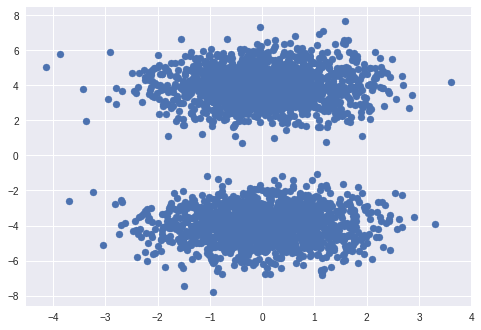

In [12]:
plt.scatter(set1['x'], set1['y']);

There appear to be 2 clusters.

In [13]:
# Create kmeans object
model = KMeans(n_clusters=2)

# Fit kmeans object to data
model.fit(set1.as_matrix())

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
# Print location of clusters learned by kmeans object
centroids = model.cluster_centers_
print('Cluster Centroids:\n' + str(centroids))

Cluster Centroids:
[[ 0.03215312  3.99663419]
 [ 0.03429001 -4.01502973]]


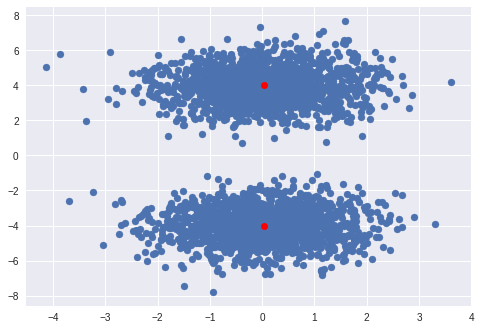

In [23]:
plt.scatter(set1['x'], set1['y'])
plt.plot(centroids[:,0], centroids[:,1], 'ro');

### 3. Compare/contrast the performance of your two algorithms with two datasets

In [25]:
# Second dataset
set2 = pd.read_csv('https://www.dropbox.com/s/zakq7e0r8n1tob9/clustering_set2.csv?raw=1', index_col=0)
set2.head()

,x,y
0,0.649105,-3.072988
1,-0.257974,-4.430689
2,0.054035,-4.404372
3,-0.036780,-2.815223
4,0.319785,-4.395542


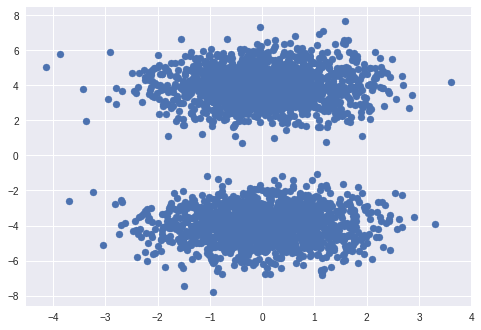

In [28]:
plt.scatter(set2['x'], set2['y']);

The data seems to be the same as in part 1. 

The clusters are mostly convex, meaning that given two points in the cluster, the points on the line connecting them are likely to also be in the cluster. They are also isotropic (the same in any direction), since they cover about 8 units of distance in boh the x and y directions, and appear circular.

Because of this, I expect K means to perform well. Spectral clustering should also perform well, but wont be too useful, especially given that the clusters are linearly separable in the first place. In fact, because it discards information during the projection onto a lower dimension, it may even perform worse.

In [31]:
n_clusters=2

model1 = KMeans(n_clusters)
model2 = SpectralClustering(n_clusters)

model1.fit(set2.as_matrix())
model2.fit(set2.as_matrix())

/usr/local/lib/python3.6/dist-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=2, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

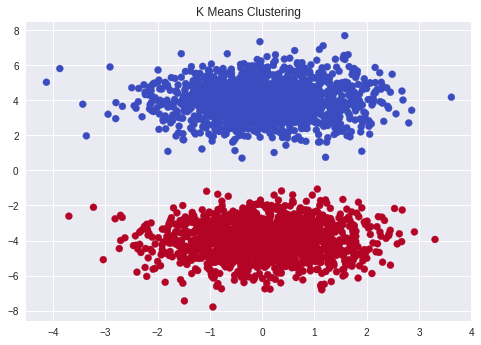

In [37]:
plt.scatter(set2['x'], set2['y'], c=model1.labels_, cmap='coolwarm')
plt.title('K Means Clustering');

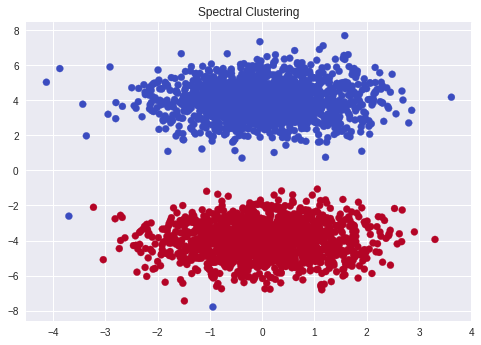

In [38]:
plt.scatter(set2['x'], set2['y'], c=model2.labels_, cmap='coolwarm')
plt.title('Spectral Clustering');

Interestingly, Spectral Clustering labeled some of the outlying points as part of the wrong cluster. This may have something to do with the information lost when projecting onto a lower dimension. Aside from this, both algorithms performed similarly, as expected.